<h1 style="background-color: #4682B4; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Titanic Disaster: Predicting Survival with Machine Learning</b>
</h1>

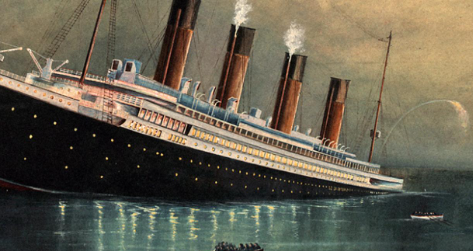

The Titanic dataset is a widely recognized project in the field of machine learning. It contains real-world data and is commonly used to build classification models. This Kaggle project includes information about the passengers on the Titanic, such as their age, class, and survival status, making it an ideal dataset for practicing machine learning techniques.

The dataset includes the following columns:

- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or not (0).
- Pclass: The class of the ticket (1st, 2nd, or 3rd class).
- Name: The name of the passenger.
- Sex: The gender of the passenger (male or female).
- Age: The age of the passenger in years.
- SibSp: The number of siblings or spouses aboard the Titanic.
- Parch: The number of parents or children aboard the Titanic.
- Ticket: The ticket number of the passenger.
- Fare: The fare paid for the ticket.
- Cabin: The cabin number where the passenger stayed (if available).
- Embarked: The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

This dataset is used to explore patterns and relationships that may have influenced survival chances, providing a basis for building predictive models and performing statistical analysis.

**Model Description and Workflow**

In this project, we will build and evaluate several machine learning models to predict survival on the Titanic. The models we will use include:

1. **AdaBoosting Regressor**: A boosting method that combines multiple weak learners to create a strong predictive model. We have optimized the model using grid search and analyzed feature importance.

2. **Gradient Boosting Regressor**: Another boosting technique that builds models sequentially to correct the errors of the previous models. This model has also been fine-tuned with grid search and feature importance analysis.

3. **XGBoost Model Building**: An advanced gradient boosting technique known for its high performance and efficiency. We applied grid search to optimize hyperparameters and assessed feature importance to understand model decisions.

4. **LightGBM Regressor**: A gradient boosting framework using tree-based learning algorithms, designed for speed and efficiency. Like the other models, it was optimized using grid search and feature importance was evaluated.

5. **Bagging Methods:**

- Random Forest: Combines multiple decision trees to improve prediction accuracy and reduce overfitting.
- Bagged Decision Trees: Uses multiple decision trees trained on bootstrap samples of the data to enhance model stability.

We will follow the steps below:

1. **Data Preparation**: We will use the `train.csv` file to train our models. This file contains the training data with both features and target values.
2. **Model Training**: We will build and train the models using the `train.csv` data.
3. **Prediction**: Once the models are trained, we will use the `test.csv` file to make predictions with final model. This file contains feature data without the target values.
4. **Evaluation**: Finally, we will evaluate the predictions using the `gender_submission.csv` file. This file provides a template for the submission format and will be used to measure the accuracy of our final predictions.

## Import Library

In [1]:
# !pip install lightgbm

In [2]:
# !pip install xgboost

In [3]:
# !pip install lazypredict

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from lazypredict.Supervised import LazyClassifier

## Read Data

In [5]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [6]:
df2 = pd.read_csv("test.csv")

## Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


**General Interpretation of Variables:**

1. PassengerId: This is a unique identification number for each passenger. It is not used in modeling as it does not have a direct relationship with whether a passenger survived or not.
2. Survived: This is our target variable. It indicates whether the passenger survived (1) or not (0). This is the value that the model will try to predict.
3. Pclass: This indicates the class of service the passenger was traveling in (1, 2, or 3). Generally, passengers in higher classes had a higher probability of survival.
4. Age: This is the age of the passenger. Age is known to have a significant impact on survival.
5. SibSp: This indicates the number of siblings or spouses aboard the Titanic.
6. Parch: This indicates the number of parents or children aboard the Titanic.
7. Fare: This is the fare paid by the passenger. Generally, passengers who paid higher fares had better cabins and therefore a higher probability of survival.

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep="first").sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep="first", inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


## Missing Value Control 

In [13]:
missing_values = df.isnull().sum()  
missing_percentage = (df.isnull().sum() / len(df)) * 100  

missing_data = pd.DataFrame({
    "Missing Values": missing_values,  
    "Percentage": missing_percentage   
})

missing_data = missing_data[missing_data["Missing Values"] > 0]

print(missing_data.sort_values(by="Missing Values", ascending=False))  

          Missing Values  Percentage
Cabin                687       77.10
Age                  177       19.87
Embarked               2        0.22


In [14]:
def missing_data_percentage(df):
    """
    Visualizes the percentage of missing data in each feature of the given DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    """
    missing_percentage = 100 * df.isnull().sum() / len(df)
    
    missing_percentage = missing_percentage[missing_percentage > 0].sort_values()
    missing_percentage = missing_percentage.round(1)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(missing_percentage.index, missing_percentage.values, color='darkorange', height=0.6)

    for index, value in enumerate(missing_percentage):
        ax.text(value + 1, index, f"{value}%", va='center', color='darkorange', fontsize=10, fontweight='bold')

    ax.set_xlim(0, 105)
    ax.set_title("Missing Data Percentage by Feature", fontsize=16)
    ax.set_xlabel("Percentage (%)", fontsize=12)
    
    plt.show()

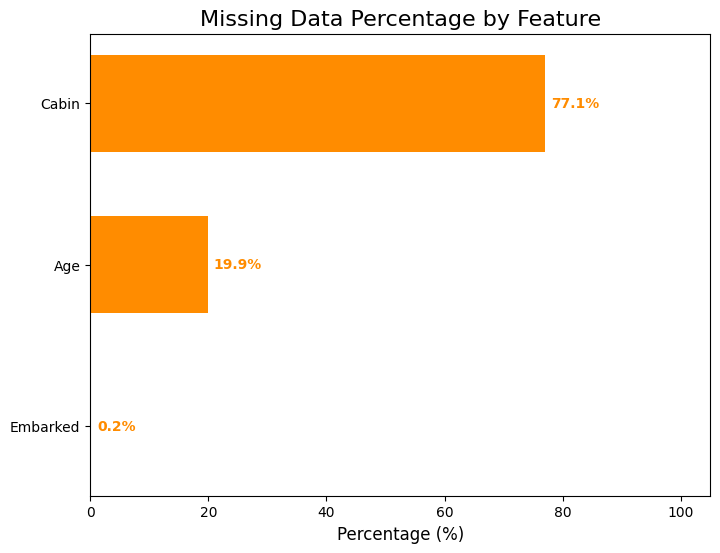

In [15]:
missing_data_percentage(df)

## Cabin

In [16]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

** Relationship Between `Pclass` and `Cabin`**

`Pclass` and `Cabin` are not the same, although there is a relationship between them:

- **`Pclass` (Passenger Class):** This column represents the class of the ticket purchased by the passenger, with values 1, 2, or 3:
  - 1: First class
  - 2: Second class
  - 3: Third class

- **`Cabin`:** This column represents the cabin in which the passenger stayed on the ship, typically consisting of a letter (representing the deck) and a number (indicating the cabin number). The letter denotes the deck, and the number denotes the specific cabin.

** Relationship:**

- **Pclass and Cabin Deck Letter:** Generally, first-class passengers are located on higher decks (e.g., A, B, C), while second and third-class passengers are on lower decks (e.g., D, E, F, G). However, this can vary depending on the design of the ship.

** Differences:**

- `Pclass` indicates the ticket class of the passenger, while `Cabin` provides more specific information about the location of the cabin. Therefore, passengers with the same `Pclass` can be in different cabins on different decks.

** Conclusion:**

Both features represent different aspects and could be useful in modeling. For example:
- `Pclass` might represent socio-economic status.
- `Cabin` could reflect the physical location on the ship and its potential impact on survival chances.

Thus, it may be beneficial to consider both features separately in the model.


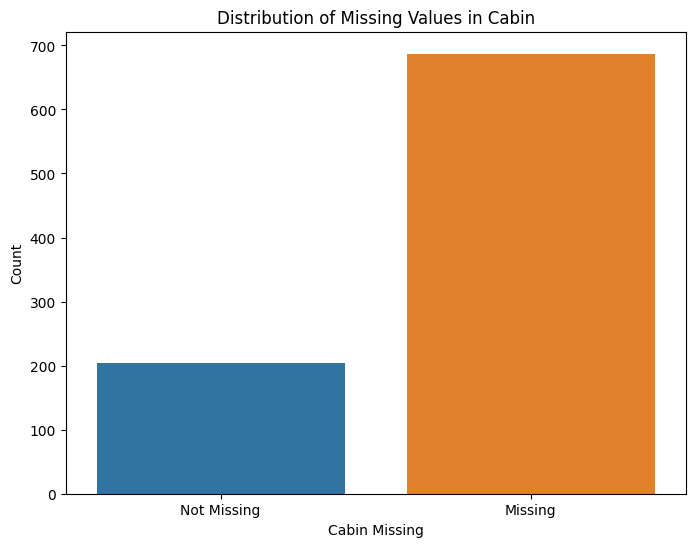

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Cabin"].isnull())
plt.title("Distribution of Missing Values in Cabin")
plt.xlabel("Cabin Missing")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Missing", "Missing"])
plt.show()

In [19]:
# Since the 'Cabin' column has a high percentage of missing values (77%),
# we will drop this column from the dataset. A high proportion of missing data
# in a column can significantly affect the analysis and model performance.
df.drop(columns=["Cabin"], inplace=True)

## Age

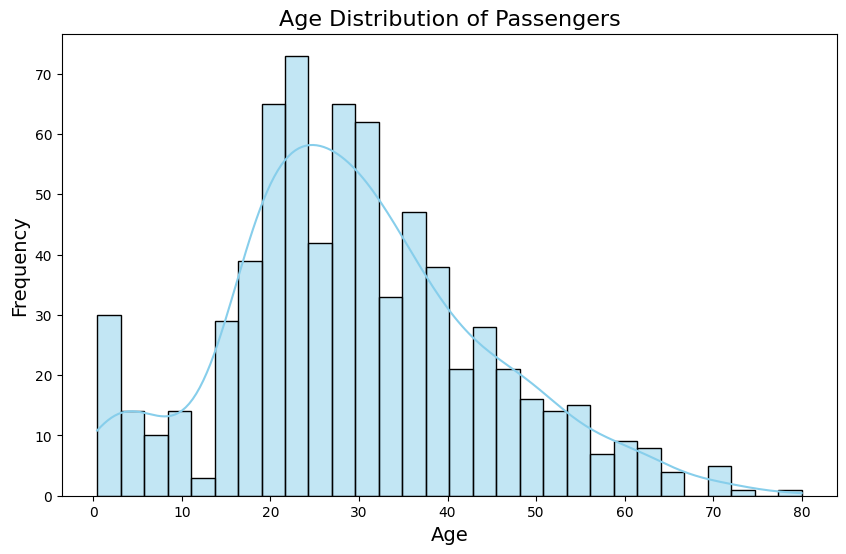

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"].dropna(), bins=30, color="skyblue", kde=True)
plt.title("Age Distribution of Passengers", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

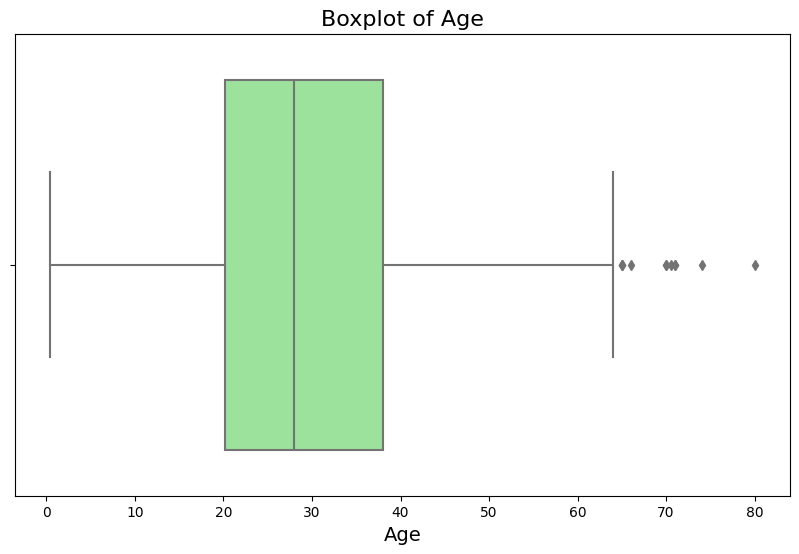

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Age"], color="lightgreen")
plt.title("Boxplot of Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.show()

In [22]:
median_age = df["Age"].median()

df["Age"].fillna(median_age, inplace=True)

print(df["Age"].isnull().sum())

0


## Embarked

In [23]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.55
1,Q,0.39
2,S,0.34


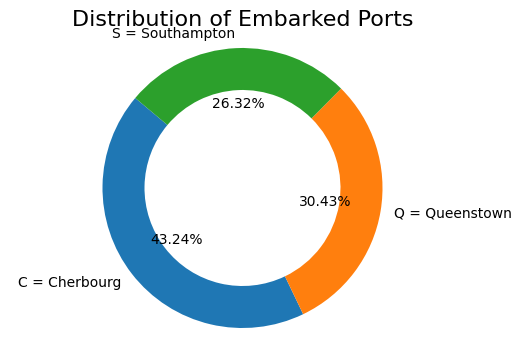

In [25]:
plt.figure(figsize=(6, 4))  

labels = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
sizes = [0.553571, 0.389610, 0.336957]

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, wedgeprops={'width': 0.3})
plt.axis('equal')  

plt.title('Distribution of Embarked Ports', fontsize=16)
plt.show()

In [26]:
most_frequent_embarked = df["Embarked"].mode()[0]

df["Embarked"].fillna(most_frequent_embarked, inplace=True)

print(df["Embarked"].isnull().sum())

0


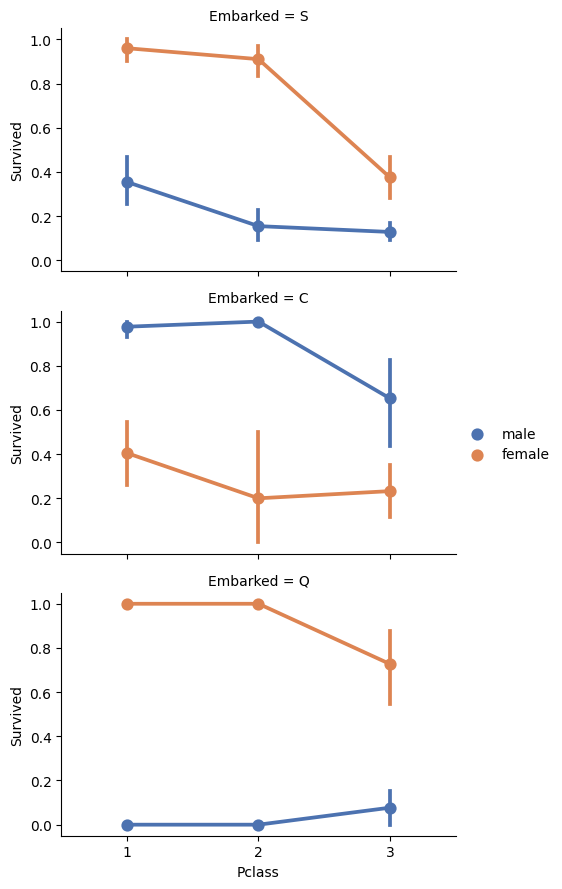

In [27]:
grid = sns.FacetGrid(df, row="Embarked", aspect=1.6)

grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette='deep')
grid.add_legend()

## PassengerID, Name, Ticket

In [28]:
#Droping Useless Columns

**Why Can We Consider Dropping PassengerID, Name, and Ticket Columns?**

PassengerID: This is a unique identification number assigned to each passenger. It does not influence the model's learning because it has no direct relationship with whether a passenger survived or not.

Name: This column contains the passenger's first and last names. This information can complicate the model's learning process and reduce its generalization ability. Additionally, names can be written in different languages and with various spelling variations, which can add complexity to the data cleaning process.

Ticket: The ticket number is usually assigned randomly or irregularly. Therefore, it is not expected to have a significant impact on the model's learning.

In [29]:
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S


## SipSp, Parch

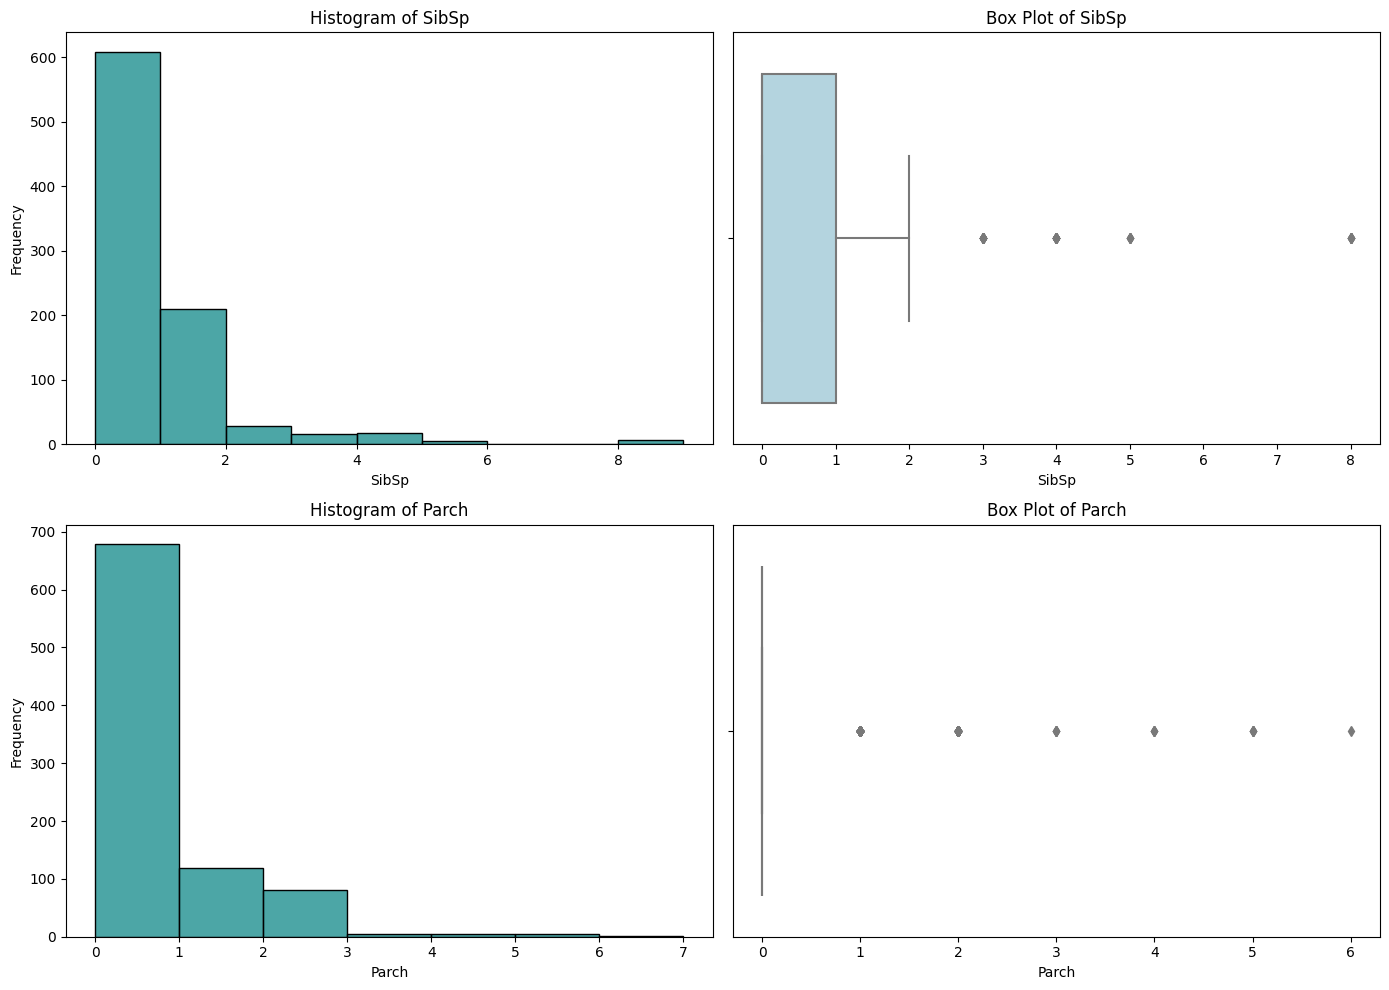

In [31]:
columns_to_plot = ["SibSp", "Parch"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for idx, col in enumerate(columns_to_plot):
    ax_hist = axes[idx, 0]
    ax_box = axes[idx, 1]
    
    bin_edges = np.arange(df[col].min(), df[col].max() + 2)
    
    sns.histplot(data=df, x=col, bins=bin_edges, ax=ax_hist, color='teal', alpha=0.7)
    ax_hist.set_title(f'Histogram of {col}')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')
    
    sns.boxplot(data=df, x=col, ax=ax_box, color='lightblue')
    ax_box.set_title(f'Box Plot of {col}')
    ax_box.set_xlabel(col)

plt.tight_layout()
plt.show()

In [32]:
# This new column represents the total number of family members
df["FamilySize"] = df["SibSp"] + df["Parch"]

# Drop the original 'SibSp' and 'Parch' columns from the dataframe
# This step simplifies the dataframe by removing redundant columns, leaving only the 'family' feature
df = df.drop(columns=["SibSp", "Parch"])

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.00,7.25,S,1
1,1,1,female,38.00,71.28,C,1
2,1,3,female,26.00,7.92,S,0
3,1,1,female,35.00,53.10,S,1
4,0,3,male,35.00,8.05,S,0


## Fare

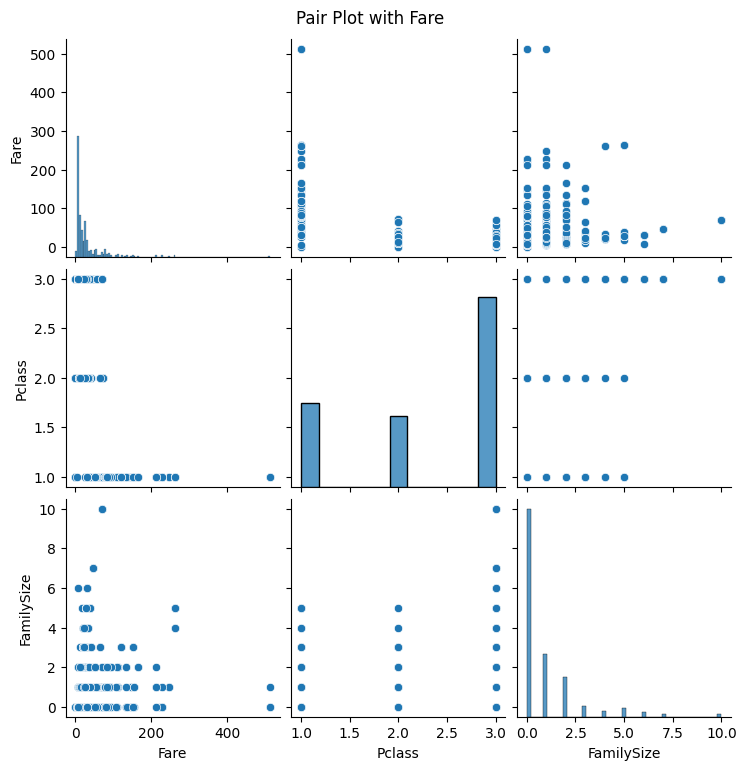

In [33]:
sns.pairplot(df[["Fare", "Pclass", "FamilySize"]]) 
plt.suptitle("Pair Plot with Fare", y=1.02)
plt.show()

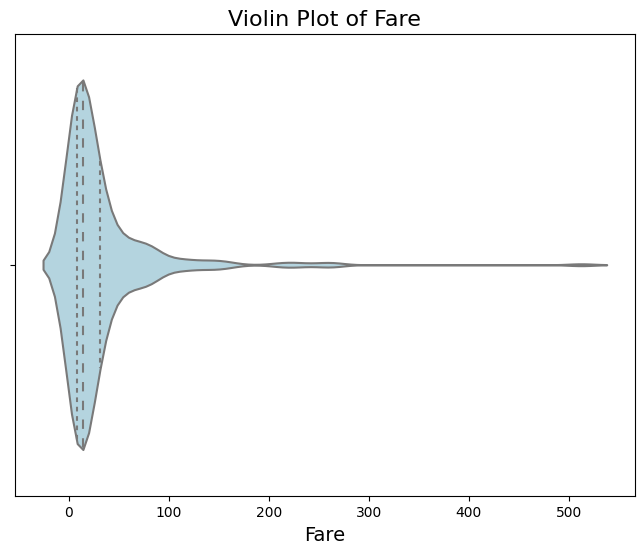

In [34]:
plt.figure(figsize=(8, 6))

sns.violinplot(data=df, x="Fare", color='lightblue', inner='quartile')

plt.title('Violin Plot of Fare', fontsize=16)
plt.xlabel("Fare", fontsize=14)
plt.show()

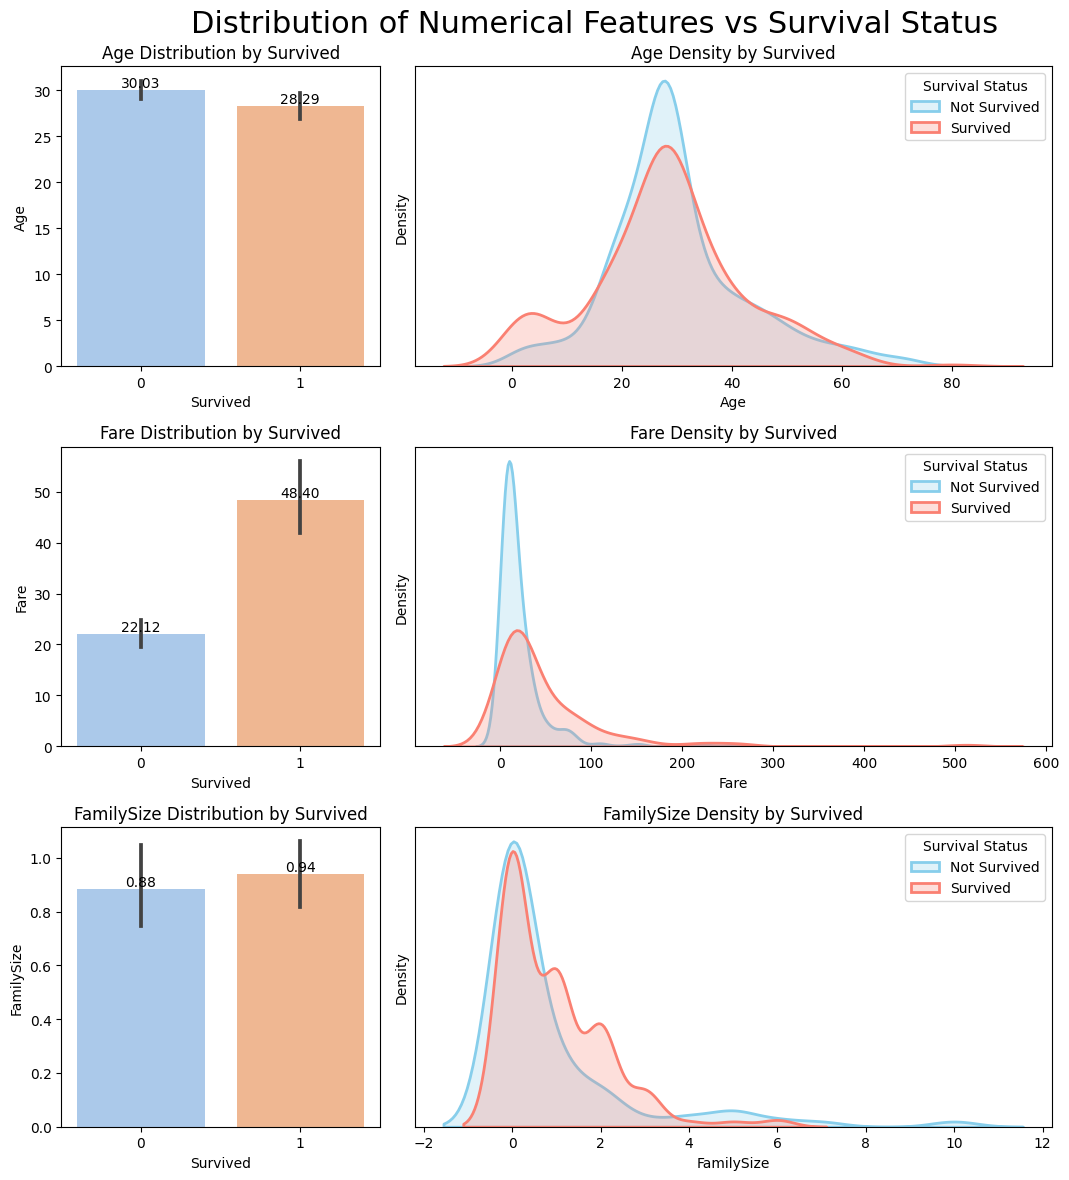

In [35]:
numerical_features = ["Age", "Fare", "FamilySize"]
sns.set_palette(['skyblue', 'salmon']) 

fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(12, 12), gridspec_kw={'width_ratios': [1, 2]})

for idx, feature in enumerate(numerical_features):
    sns.barplot(data=df, x='Survived', y=feature, ax=axes[idx, 0], palette='pastel')
    axes[idx, 0].set_title(f'{feature} Distribution by Survived')
    axes[idx, 0].set_xlabel('Survived')
    axes[idx, 0].set_ylabel(feature)
    
    sns.kdeplot(data=df[df['Survived'] == 0], x=feature, fill=True, linewidth=2, ax=axes[idx, 1], label='Not Survived', color='skyblue')
    sns.kdeplot(data=df[df['Survived'] == 1], x=feature, fill=True, linewidth=2, ax=axes[idx, 1], label='Survived', color='salmon')
    axes[idx, 1].set_title(f'{feature} Density by Survived')
    axes[idx, 1].legend(title='Survival Status', loc='upper right')
    axes[idx, 1].set_yticks([])  

    
    for container in axes[idx, 0].containers:
        axes[idx, 0].bar_label(container, fmt='%.2f')

plt.suptitle('Distribution of Numerical Features vs Survival Status', fontsize=22)
plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()

## Sex

In [36]:
df["Male"] = df["Sex"].map({"male": 1, "female": 0})

df = df.drop(columns=["Sex"])

df

,Survived,Pclass,Age,Fare,Embarked,FamilySize,Male
0,0,3,22.00,7.25,S,1,1
1,1,1,38.00,71.28,C,1,0
2,1,3,26.00,7.92,S,0,0
3,1,1,35.00,53.10,S,1,0
4,0,3,35.00,8.05,S,0,1
...,...,...,...,...,...,...,...
886,0,2,27.00,13.00,S,0,1
887,1,1,19.00,30.00,S,0,0
888,0,3,28.00,23.45,S,3,0
889,1,1,26.00,30.00,C,0,1


## Survived

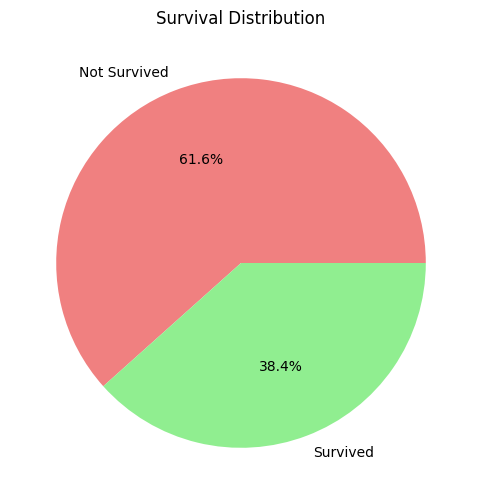

In [37]:
survival_counts = df["Survived"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=["Not Survived", "Survived"], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Survival Distribution')
plt.show()

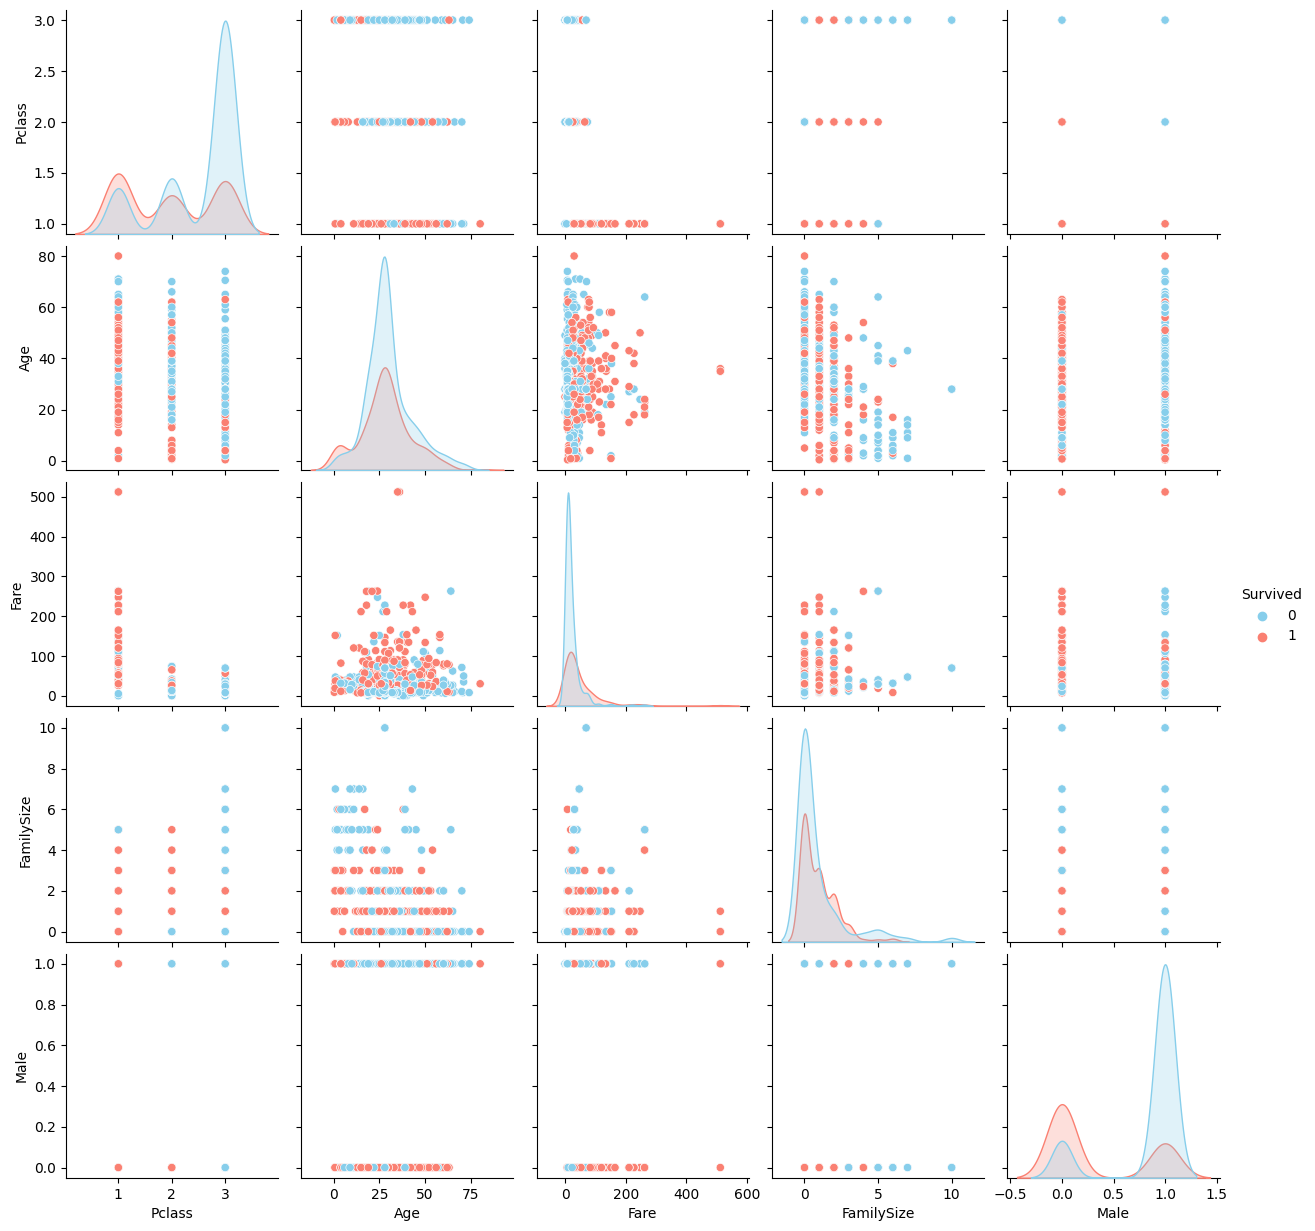

In [38]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

sns.pairplot(df[num_cols],hue = "Survived")
plt.show()

## Encoding

In [39]:
survival_rate_by_embarked = df.groupby("Embarked")["Survived"].mean().reset_index()
survival_rate_by_embarked.columns = ["Embarked", "Survival Rate"]

print(survival_rate_by_embarked)

  Embarked  Survival Rate
0        C           0.55
1        Q           0.39
2        S           0.34


In [40]:
from sklearn.preprocessing import OrdinalEncoder

embarked_order = ['C', 'Q', 'S']  
ordinal_encoder = OrdinalEncoder(categories=[embarked_order])

df["Embarked"] = ordinal_encoder.fit_transform(df[["Embarked"]])

print(df)

     Survived  Pclass   Age  Fare  Embarked  FamilySize  Male
0           0       3 22.00  7.25      2.00           1     1
1           1       1 38.00 71.28      0.00           1     0
2           1       3 26.00  7.92      2.00           0     0
3           1       1 35.00 53.10      2.00           1     0
4           0       3 35.00  8.05      2.00           0     1
..        ...     ...   ...   ...       ...         ...   ...
886         0       2 27.00 13.00      2.00           0     1
887         1       1 19.00 30.00      2.00           0     0
888         0       3 28.00 23.45      2.00           3     0
889         1       1 26.00 30.00      0.00           0     1
890         0       3 32.00  7.75      1.00           0     1

[891 rows x 7 columns]


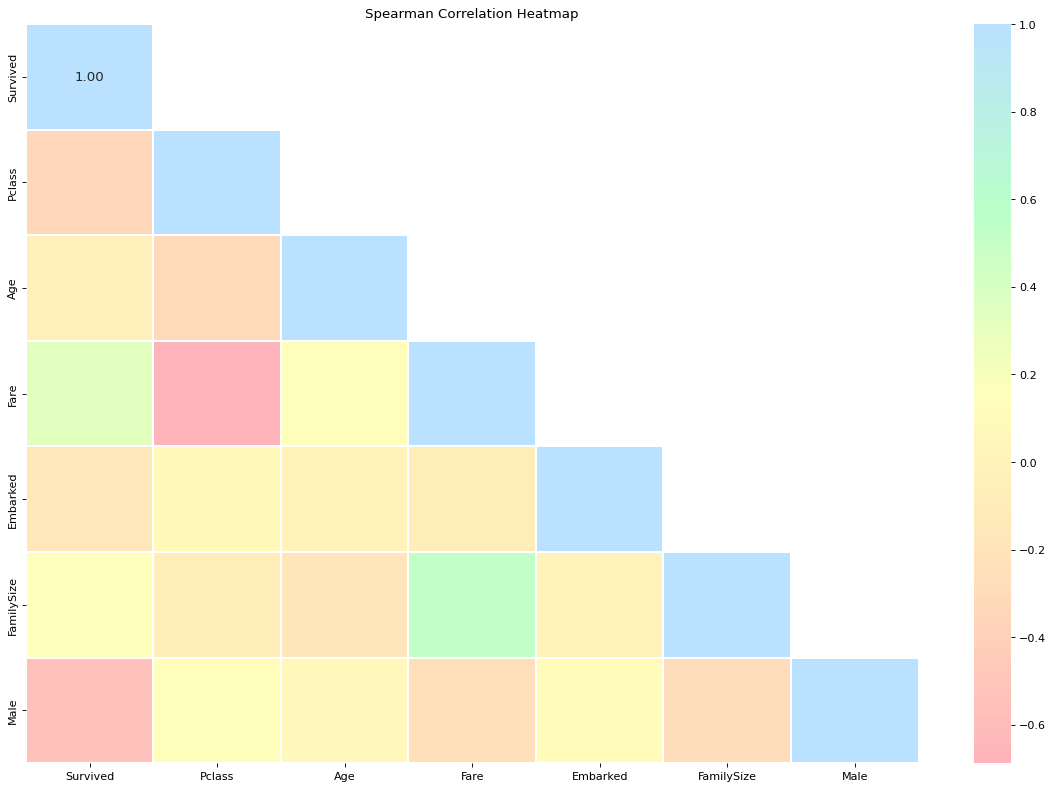

In [41]:
from matplotlib.colors import LinearSegmentedColormap

pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']
pastel_cmap = LinearSegmentedColormap.from_list('pastel_colormap', pastel_colors, N=256)

correlation_matrix = df.corr(method='spearman')

mask_array = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(18, 12), dpi=80)
sns.heatmap(correlation_matrix, mask=mask_array, annot=True, cmap=pastel_cmap, fmt='.2f', linewidths=0.2, annot_kws={"size": 12})
plt.title('Spearman Correlation Heatmap')
plt.show()

# Train | Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop("Survived", axis=1)
y = df["Survived"] 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=61)

In [45]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (757, 6)
Train target shape   :  (757,)
Test features shape  :  (134, 6)
Test target shape    :  (134,)


# AdaBoosting Regressor

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
ada_model = AdaBoostClassifier()

ada_param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1.0]
}

In [48]:
ada_grid_search = GridSearchCV(
    estimator=ada_model,
    param_grid=ada_param_grid,
    cv=5,  
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [49]:
ada_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [50]:
ada_best_params = ada_grid_search.best_params_
ada_best_model = ada_grid_search.best_estimator_

In [51]:
ada_train_pred = ada_best_model.predict(X_train)
ada_train_accuracy = accuracy_score(y_train, ada_train_pred)
ada_train_conf_matrix = confusion_matrix(y_train, ada_train_pred)
ada_train_class_report = classification_report(y_train, ada_train_pred)

In [52]:
ada_test_pred = ada_best_model.predict(X_test)
ada_test_accuracy = accuracy_score(y_test, ada_test_pred)
ada_test_conf_matrix = confusion_matrix(y_test, ada_test_pred)
ada_test_class_report = classification_report(y_test, ada_test_pred)

In [53]:
print("\nAdaBoost Model with GridSearchCV")
print(f"Best Parameters: {ada_best_params}")

print("\nTraining Data Results:")
print(f"Accuracy: {ada_train_accuracy:.2f}")
print("Confusion Matrix:")
print(ada_train_conf_matrix)
print("Classification Report:")
print(ada_train_class_report)

print("\nTest Data Results:")
print(f"Accuracy: {ada_test_accuracy:.2f}")
print("Confusion Matrix:")
print(ada_test_conf_matrix)
print("Classification Report:")
print(ada_test_class_report)


AdaBoost Model with GridSearchCV
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}

Training Data Results:
Accuracy: 0.82
Confusion Matrix:
[[411  55]
 [ 84 207]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       466
           1       0.79      0.71      0.75       291

    accuracy                           0.82       757
   macro avg       0.81      0.80      0.80       757
weighted avg       0.81      0.82      0.81       757


Test Data Results:
Accuracy: 0.80
Confusion Matrix:
[[75  8]
 [19 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        83
           1       0.80      0.63      0.70        51

    accuracy                           0.80       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.80      0.80      0.79       134



## Feature Importance for  AdaBoost Model

In [54]:
importances = ada_best_model.feature_importances_

In [55]:
importances_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

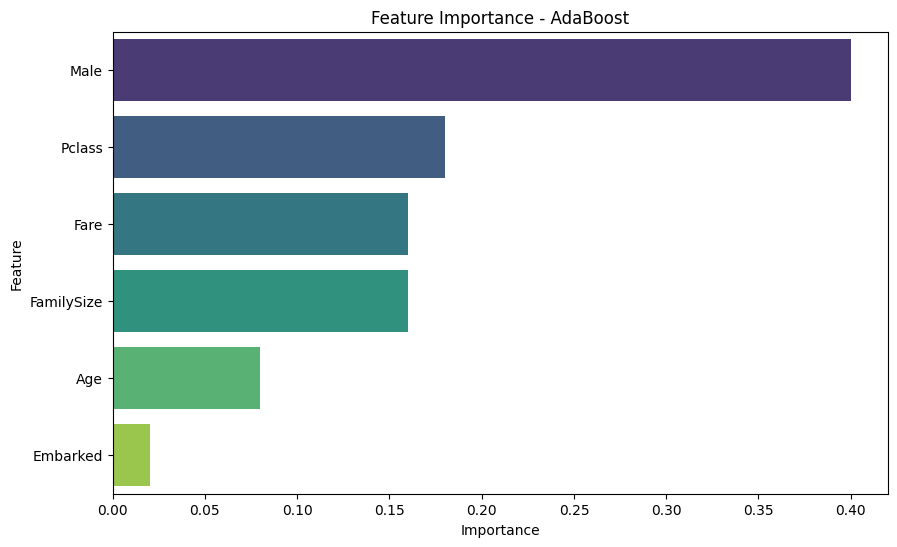

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances_df, palette="viridis")
plt.title("Feature Importance - AdaBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Gradient Boosting Regressor

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gb_model = GradientBoostingClassifier()

gb_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 0.9, 1.0]
}

In [59]:
gb_grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [60]:
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [61]:
gb_best_params = gb_grid_search.best_params_
gb_best_model = gb_grid_search.best_estimator_

In [62]:
gb_train_pred = gb_best_model.predict(X_train)
gb_train_accuracy = accuracy_score(y_train, gb_train_pred)
gb_train_conf_matrix = confusion_matrix(y_train, gb_train_pred)
gb_train_class_report = classification_report(y_train, gb_train_pred)

In [63]:
gb_test_pred = gb_best_model.predict(X_test)
gb_test_accuracy = accuracy_score(y_test, gb_test_pred)
gb_test_conf_matrix = confusion_matrix(y_test, gb_test_pred)
gb_test_class_report = classification_report(y_test, gb_test_pred)

In [64]:
print("\nGradient Boosting Model with GridSearchCV")
print(f"Best Parameters: {gb_best_params}")

print("\nTraining Data Results:")
print(f"Accuracy: {gb_train_accuracy:.2f}")
print("Confusion Matrix:")
print(gb_train_conf_matrix)
print("Classification Report:")
print(gb_train_class_report)

print("\nTest Data Results:")
print(f"Accuracy: {gb_test_accuracy:.2f}")
print("Confusion Matrix:")
print(gb_test_conf_matrix)
print("Classification Report:")
print(gb_test_class_report)



Gradient Boosting Model with GridSearchCV
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

Training Data Results:
Accuracy: 0.94
Confusion Matrix:
[[455  11]
 [ 31 260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       466
           1       0.96      0.89      0.93       291

    accuracy                           0.94       757
   macro avg       0.95      0.93      0.94       757
weighted avg       0.95      0.94      0.94       757


Test Data Results:
Accuracy: 0.84
Confusion Matrix:
[[75  8]
 [14 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        83
           1       0.82      0.73      0.77        51

    accuracy                           0.84       134
   macro avg       0.83      0.81      0.82       134
weighted avg       0.83      0.84      0.83       134



## Feature Importance for Gradient Boost Model

In [65]:
feature_importances = gb_best_model.feature_importances_

In [66]:
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

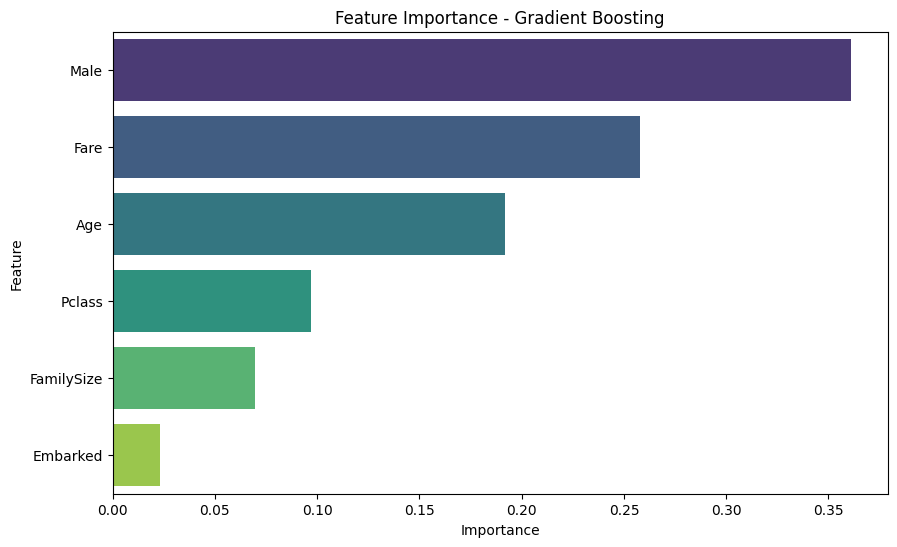

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# XGBoost Model Building

In [68]:
import xgboost as xgb

In [69]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

xgb_param_grid = {
    "n_estimators": [250, 300, 350],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9]
}

In [70]:
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=5,  
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [71]:
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [250, 300, 350],
                         'subsample': [0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [72]:
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_

In [73]:
xgb_train_pred = xgb_best_model.predict(X_train)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_train_conf_matrix = confusion_matrix(y_train, xgb_train_pred)
xgb_train_class_report = classification_report(y_train, xgb_train_pred)

In [74]:
xgb_test_pred = xgb_best_model.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_conf_matrix = confusion_matrix(y_test, xgb_test_pred)
xgb_test_class_report = classification_report(y_test, xgb_test_pred)

In [75]:
print("\nXGBoost Model with GridSearchCV")
print(f"Best Parameters: {xgb_best_params}")

print("\nTraining Data Results:")
print(f"Accuracy: {xgb_train_accuracy:.2f}")
print("Confusion Matrix:")
print(xgb_train_conf_matrix)
print("Classification Report:")
print(xgb_train_class_report)

print("\nTest Data Results:")
print(f"Accuracy: {xgb_test_accuracy:.2f}")
print("Confusion Matrix:")
print(xgb_test_conf_matrix)
print("Classification Report:")
print(xgb_test_class_report)



XGBoost Model with GridSearchCV
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 350, 'subsample': 0.9}

Training Data Results:
Accuracy: 0.87
Confusion Matrix:
[[443  23]
 [ 73 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       466
           1       0.90      0.75      0.82       291

    accuracy                           0.87       757
   macro avg       0.88      0.85      0.86       757
weighted avg       0.88      0.87      0.87       757


Test Data Results:
Accuracy: 0.85
Confusion Matrix:
[[79  4]
 [16 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        83
           1       0.90      0.69      0.78        51

    accuracy                           0.85       134
   macro avg       0.86      0.82      0.83       134
weighted avg       0.86      0.85      0.85      

## Future Importance for XGBoost Model

In [76]:
feature_importances = xgb_best_model.feature_importances_

In [77]:
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

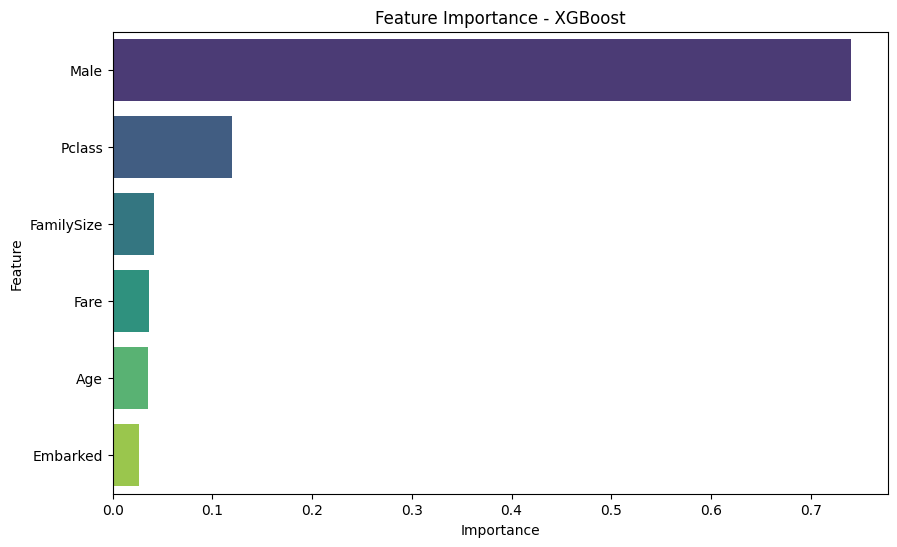

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# LightGBM Regressor

In [79]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
lgb_model = lgb.LGBMClassifier()

lgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "num_leaves": [31, 63, 127],
    "max_depth": [-1, 5, 10]
}

In [81]:
lgb_grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=lgb_param_grid,
    cv=5,  
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [82]:
lgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 291, number of negative: 466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384412 -> initscore=-0.470862
[LightGBM] [Info] Start training from score -0.470862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 63, 127]},
             scoring='accuracy', verbose=1)

In [83]:
lgb_best_model = lgb_grid_search.best_estimator_

print("Best Parameters:", lgb_grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 31}


In [84]:
y_train_pred = lgb_best_model.predict(X_train)
y_test_pred = lgb_best_model.predict(X_test)
y_train_prob = lgb_best_model.predict_proba(X_train)[:, 1]
y_test_prob = lgb_best_model.predict_proba(X_test)[:, 1]

In [85]:
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix - Training Set:")
print(confusion_matrix(y_train, y_train_pred))

print("Classification Report - Test Set:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix - Test Set:")
print(confusion_matrix(y_test, y_test_pred))

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       466
           1       0.95      0.89      0.91       291

    accuracy                           0.94       757
   macro avg       0.94      0.93      0.93       757
weighted avg       0.94      0.94      0.94       757

Confusion Matrix - Training Set:
[[451  15]
 [ 33 258]]
Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        83
           1       0.81      0.76      0.79        51

    accuracy                           0.84       134
   macro avg       0.84      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134

Confusion Matrix - Test Set:
[[74  9]
 [12 39]]


## Feature Importance for LightGBM Model

In [86]:
importances = lgb_best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

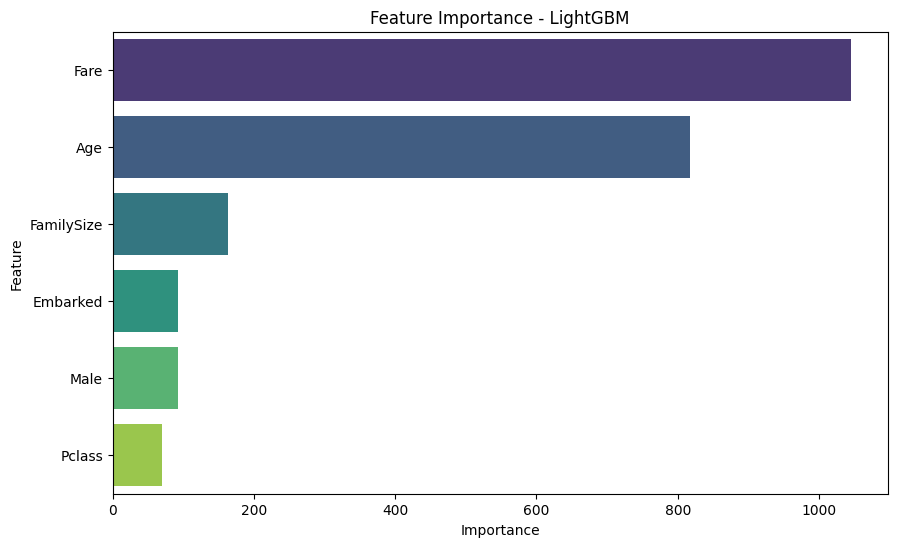

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance - LightGBM")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Bagging Methods 

## Bagging Regressor, Random Forest Regressor, Decision Tree Regressor

In [88]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [89]:
dt_model = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42)

In [90]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [91]:
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50,
                 random_state=42)

In [92]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [94]:
dt_predictions = dt_model.predict(X_test)
bagging_predictions = bagging_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

In [95]:
threshold = 0.5
dt_predictions_class = (dt_predictions > threshold).astype(int)
bagging_predictions_class = (bagging_predictions > threshold).astype(int)
random_forest_predictions_class = (random_forest_predictions > threshold).astype(int)

In [96]:
accuracy_dt = accuracy_score(y_test, dt_predictions_class)
precision_dt = precision_score(y_test, dt_predictions_class)
recall_dt = recall_score(y_test, dt_predictions_class)
f1_dt = f1_score(y_test, dt_predictions_class)

print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Decision Tree Precision: {precision_dt}')
print(f'Decision Tree Recall: {recall_dt}')
print(f'Decision Tree F1 Score: {f1_dt}')

Decision Tree Accuracy: 0.7761194029850746
Decision Tree Precision: 0.7333333333333333
Decision Tree Recall: 0.6470588235294118
Decision Tree F1 Score: 0.6875


In [97]:
accuracy_bagging = accuracy_score(y_test, bagging_predictions_class)
precision_bagging = precision_score(y_test, bagging_predictions_class)
recall_bagging = recall_score(y_test, bagging_predictions_class)
f1_bagging = f1_score(y_test, bagging_predictions_class)

print(f'Bagging Regressor Accuracy: {accuracy_bagging}')
print(f'Bagging Regressor Precision: {precision_bagging}')
print(f'Bagging Regressor Recall: {recall_bagging}')
print(f'Bagging Regressor F1 Score: {f1_bagging}')

Bagging Regressor Accuracy: 0.8283582089552238
Bagging Regressor Precision: 0.7916666666666666
Bagging Regressor Recall: 0.7450980392156863
Bagging Regressor F1 Score: 0.7676767676767677


In [98]:
accuracy_rf = accuracy_score(y_test, random_forest_predictions_class)
precision_rf = precision_score(y_test, random_forest_predictions_class)
recall_rf = recall_score(y_test, random_forest_predictions_class)
f1_rf = f1_score(y_test, random_forest_predictions_class)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1 Score: {f1_rf}')

Random Forest Accuracy: 0.8208955223880597
Random Forest Precision: 0.7755102040816326
Random Forest Recall: 0.7450980392156863
Random Forest F1 Score: 0.76


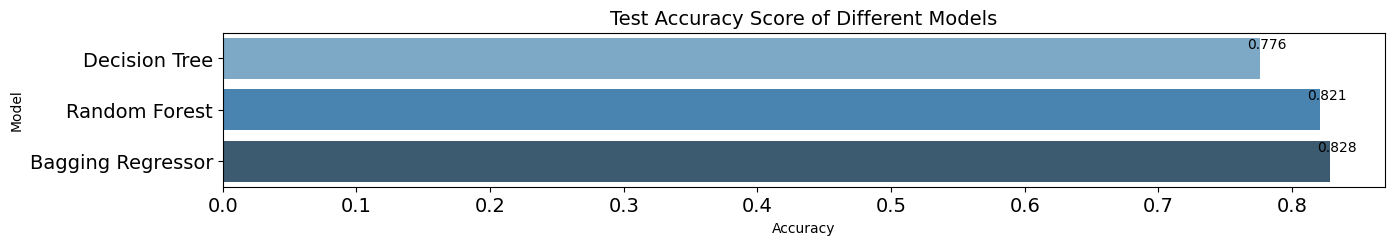

In [99]:
compare = pd.DataFrame({
    "Model": ["Decision Tree", "Bagging Regressor", "Random Forest"],
    "Accuracy": [accuracy_dt, accuracy_bagging, accuracy_rf]
})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15, 2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', ha='center', va='center')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test Accuracy Score of Different Models", size=14)
plt.show()

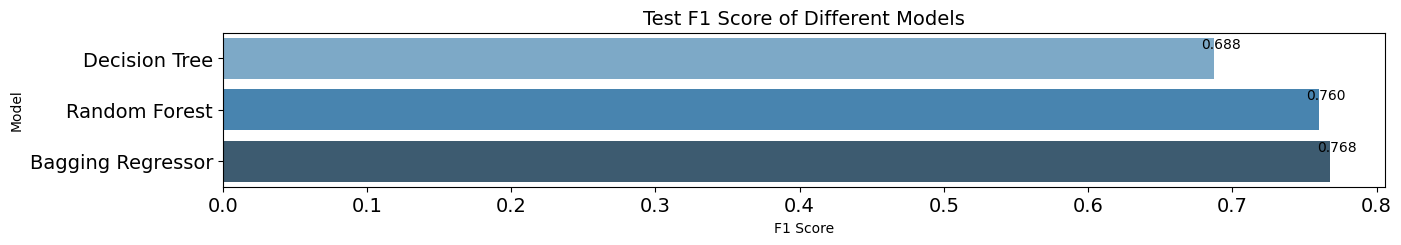

In [100]:
compare_f1 = pd.DataFrame({
    "Model": ["Decision Tree", "Bagging Regressor", "Random Forest"],
    "F1 Score": [f1_dt, f1_bagging, f1_rf]
})

compare_f1 = compare_f1.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15, 2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare_f1, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', ha='center', va='center')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test F1 Score of Different Models", size=14)
plt.show()

# Evaluate the Model Performances

In [101]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color="blue")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.show()

In [102]:
ada_y_prob = ada_best_model.predict_proba(X_test)[:, 1]
gb_y_prob = gb_best_model.predict_proba(X_test)[:, 1]
xgb_y_prob = xgb_best_model.predict_proba(X_test)[:, 1]
lgb_y_prob = lgb_best_model.predict_proba(X_test)[:, 1]

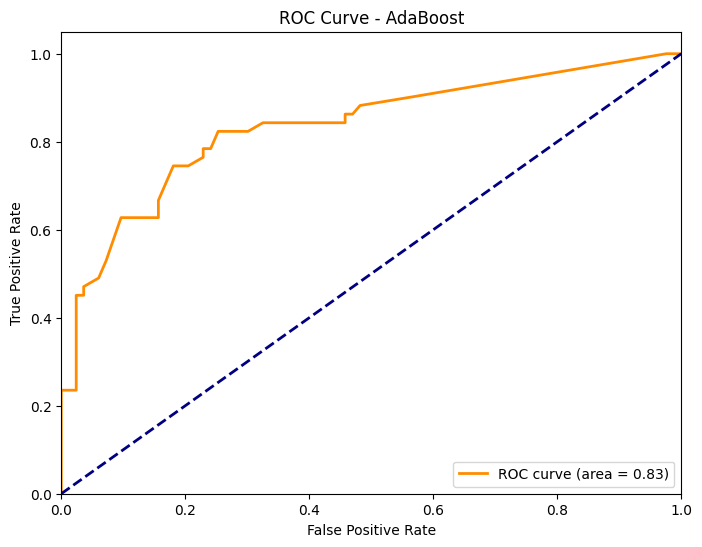

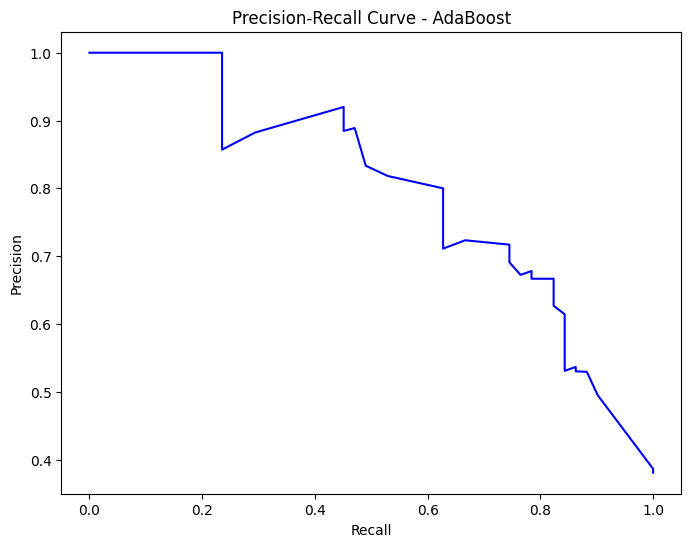

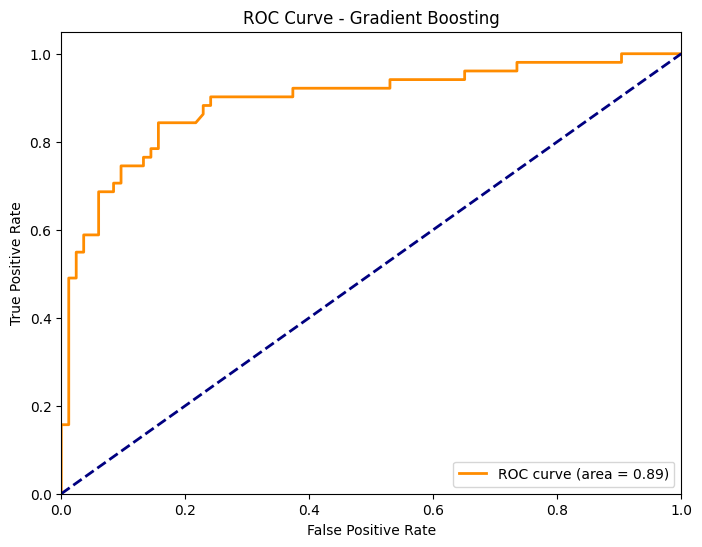

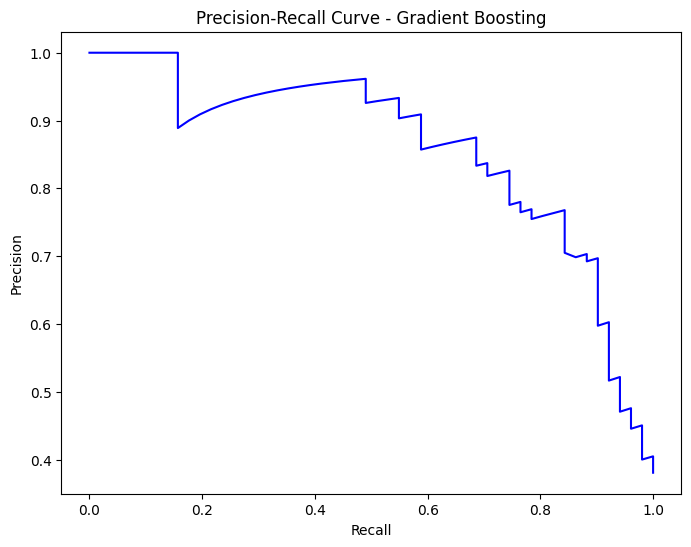

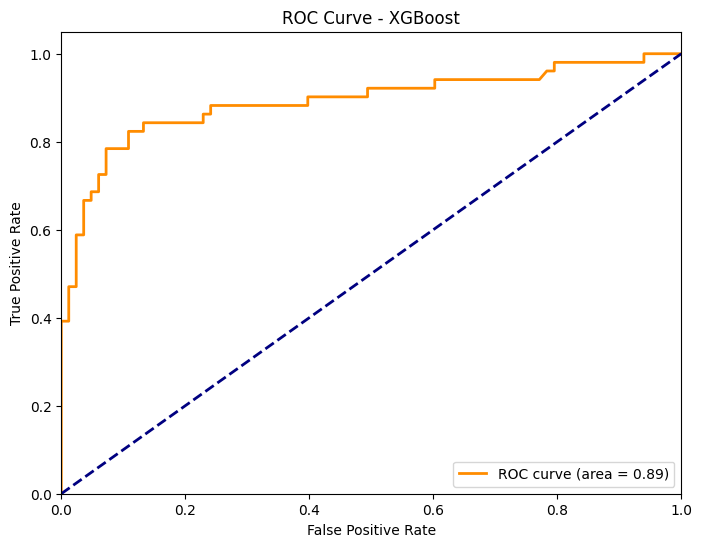

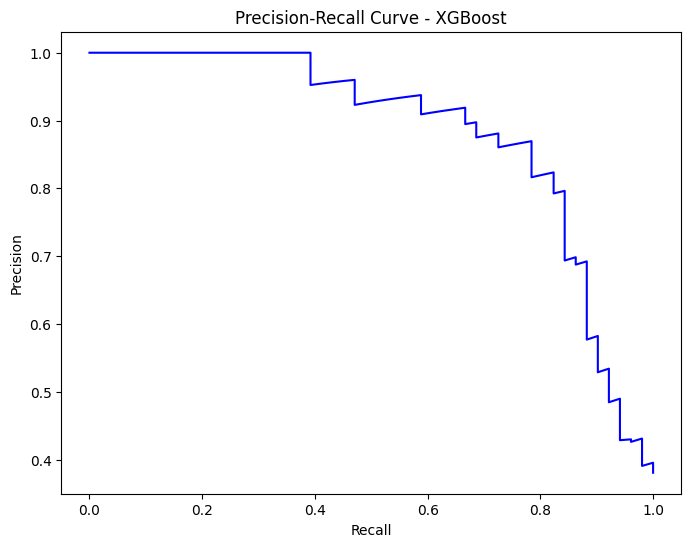

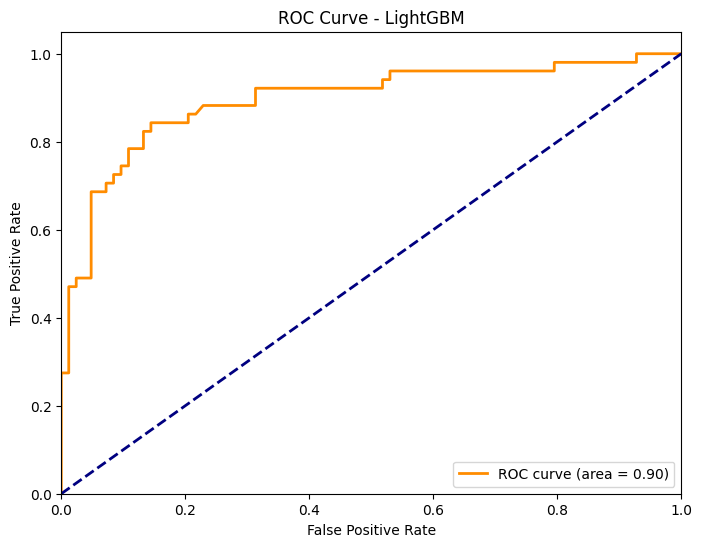

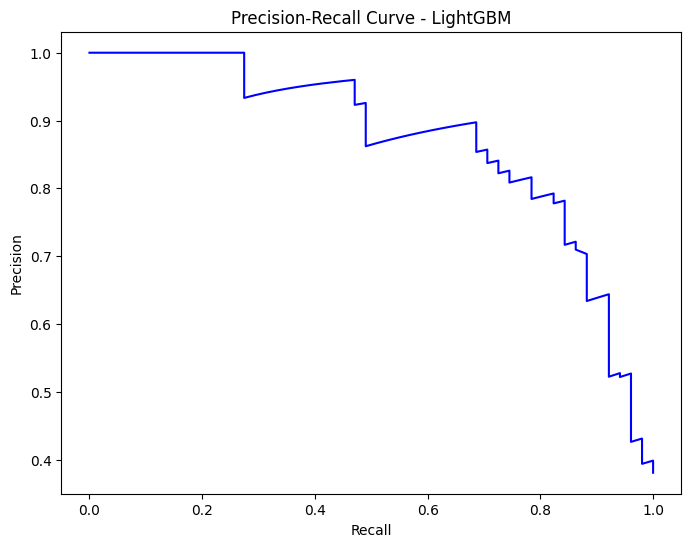

In [103]:
plot_roc_curve(y_test, ada_y_prob, "ROC Curve - AdaBoost")
plot_precision_recall_curve(y_test, ada_y_prob, "Precision-Recall Curve - AdaBoost")

plot_roc_curve(y_test, gb_y_prob, "ROC Curve - Gradient Boosting")
plot_precision_recall_curve(y_test, gb_y_prob, "Precision-Recall Curve - Gradient Boosting")

plot_roc_curve(y_test, xgb_y_prob, "ROC Curve - XGBoost")
plot_precision_recall_curve(y_test, xgb_y_prob, "Precision-Recall Curve - XGBoost")

plot_roc_curve(y_test, lgb_y_prob, "ROC Curve - LightGBM")
plot_precision_recall_curve(y_test, lgb_y_prob, "Precision-Recall Curve - LightGBM")

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns=[model_name])
    
    result = (result * 100).round(2)
    return result

In [105]:
ada_metrics = metrics_calculator(ada_best_model, X_test, y_test, 'AdaBoost')
gb_metrics = metrics_calculator(gb_best_model, X_test, y_test, 'Gradient Boosting')
xgb_metrics = metrics_calculator(xgb_best_model, X_test, y_test, 'XGBoost')
lgb_metrics = metrics_calculator(lgb_best_model, X_test, y_test, 'LightGBM')

In [106]:
all_metrics = pd.concat([ada_metrics, gb_metrics, xgb_metrics, lgb_metrics], axis=1)

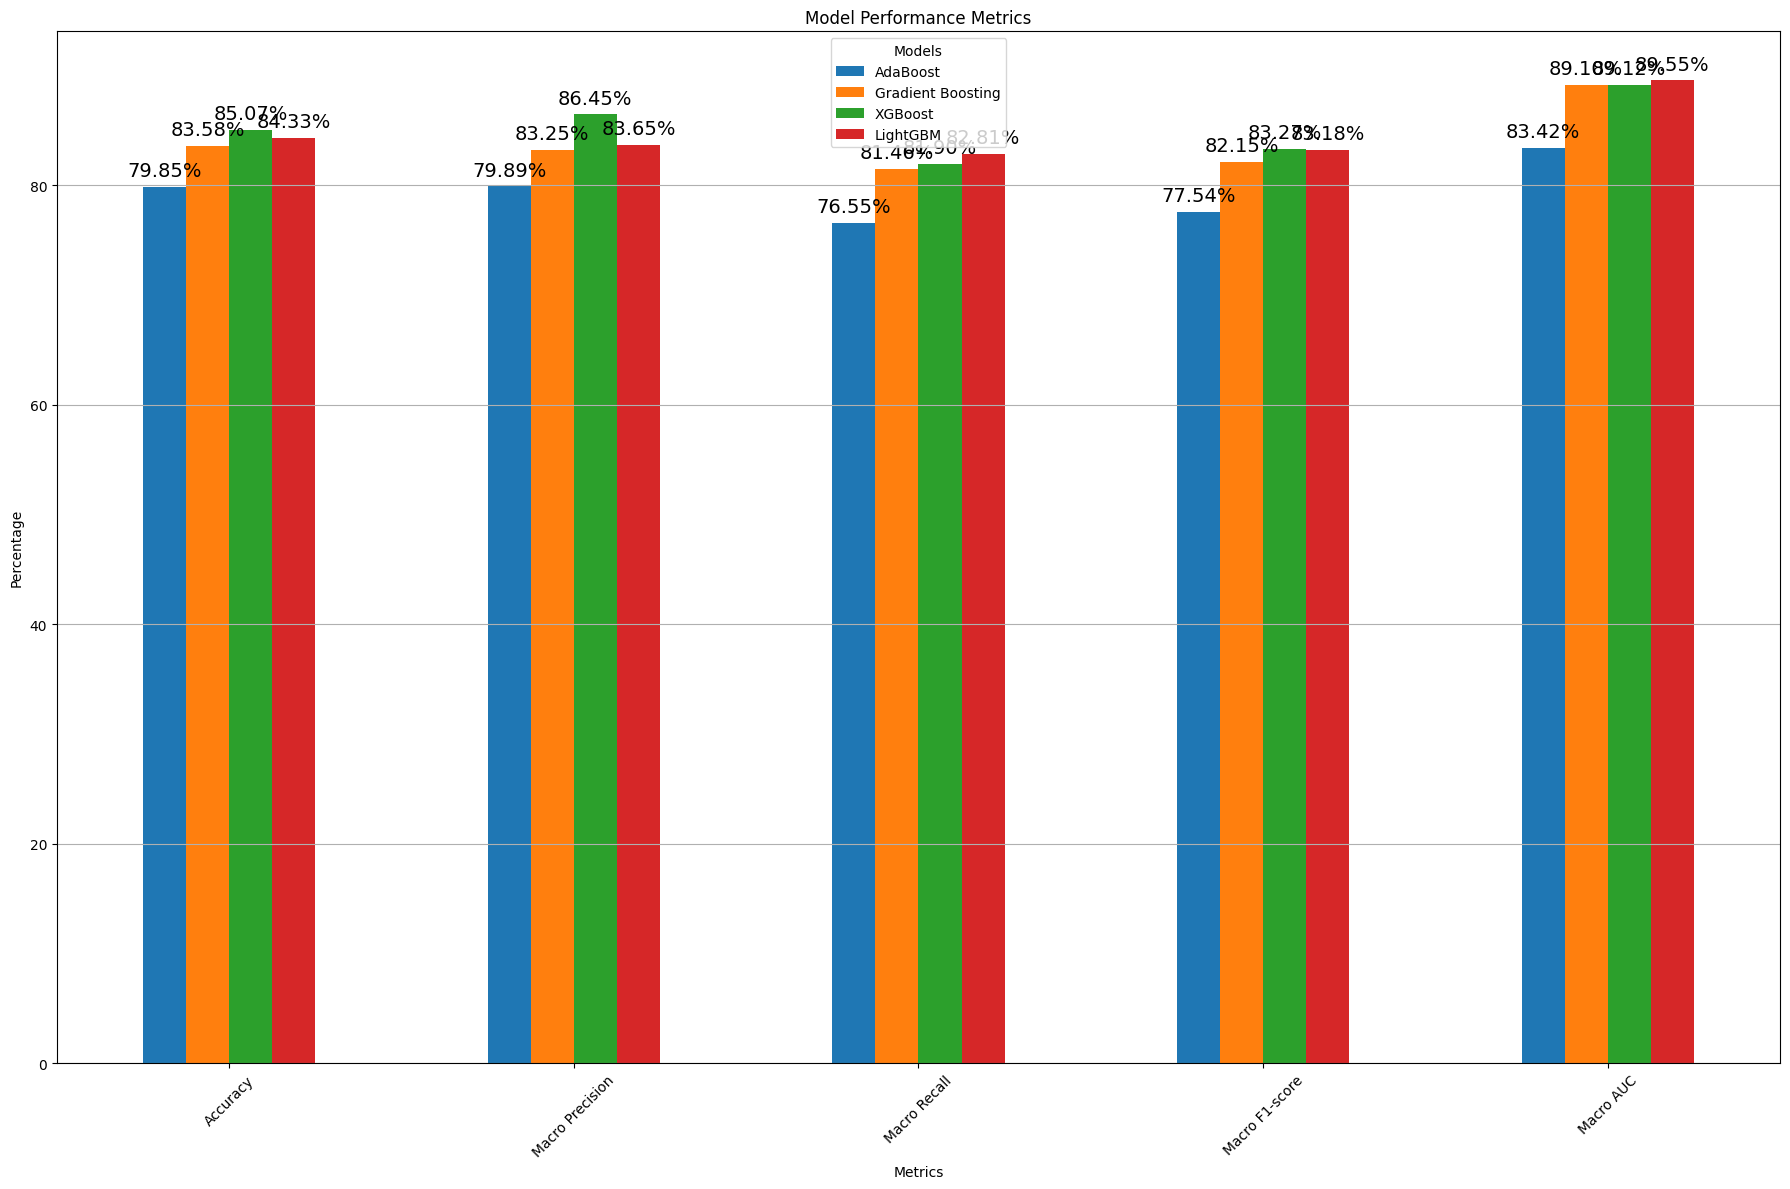

In [107]:
fig, ax = plt.subplots(figsize=(18, 12))
bars = all_metrics.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=14) 
        
plt.title("Model Performance Metrics")
plt.ylabel("Percentage")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Final Model & Prediction

In [108]:
gender_submission_df = pd.read_csv('gender_submission.csv')

In [109]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [110]:
df2 = df2.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [111]:
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [112]:
median_age = df2["Age"].median()

df2["Age"].fillna(median_age, inplace=True)

print(df2["Age"].isnull().sum())

0


In [113]:
fare_mean = df2['Fare'].mean()

df2['Fare'].fillna(fare_mean, inplace=True)

In [114]:
df2["FamilySize"] = df2["SibSp"] + df2["Parch"]

df2 = df2.drop(columns=["SibSp", "Parch"])

In [115]:
from sklearn.preprocessing import OrdinalEncoder

embarked_order = ['C', 'Q', 'S']
ordinal_encoder = OrdinalEncoder(categories=[embarked_order])

df2["Embarked"] = ordinal_encoder.fit_transform(df2[["Embarked"]])

In [116]:
df2["Male"] = df2["Sex"].map({"male": 1, "female": 0})

df2 = df2.drop(columns=["Sex"])

In [117]:
df2.head()

,Pclass,Age,Fare,Embarked,FamilySize,Male
0,3,34.50,7.83,1.00,0,1
1,3,47.00,7.00,2.00,1,0
2,2,62.00,9.69,1.00,0,1
3,3,27.00,8.66,2.00,0,1
4,3,22.00,12.29,2.00,2,0


In [118]:
best_lgbm_model = lgb_grid_search.best_estimator_

In [119]:
df2_predictions = best_lgbm_model.predict(df2)

print("Predictions for the test set:")
print(df2_predictions)

Predictions for the test set:
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [120]:
print("df2_predictions shape:", df2_predictions.shape)
print("y_test shape:", y_test.shape)

df2_predictions shape: (418,)
y_test shape: (134,)


In [121]:
y_true_df2 = gender_submission_df['Survived'].values

accuracy = accuracy_score(y_true_df2, df2_predictions)
precision = precision_score(y_true_df2, df2_predictions, average='macro')
recall = recall_score(y_true_df2, df2_predictions, average='macro')
f1 = f1_score(y_true_df2, df2_predictions, average='macro')
conf_matrix = confusion_matrix(y_true_df2, df2_predictions)

print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

[[230  36]
 [ 34 118]]
Accuracy: 0.8325
Precision: 0.8187
Recall: 0.8205
F1 Score: 0.8196


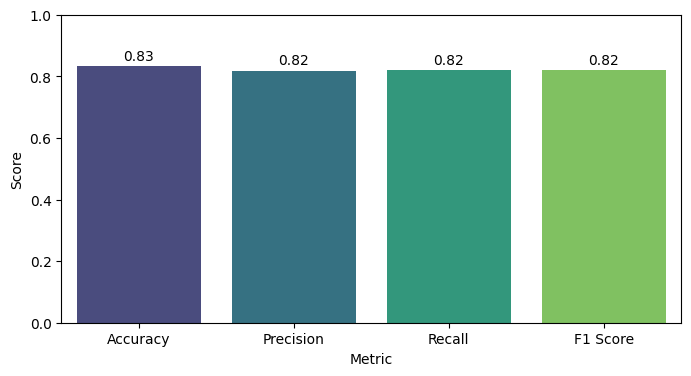

In [122]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

plt.figure(figsize=(8, 4))
sns.barplot(x="Metric", y="Score", data=metrics_df, palette="viridis")
plt.ylim(0, 1)  

for index, row in metrics_df.iterrows():
    plt.text(index, row["Score"] + 0.01, f'{row["Score"]:.2f}', ha="center", va="bottom")

plt.show()

# Lazy Predict Library

In [123]:
# !pip install lazypredict

In [124]:
from lazypredict.Supervised import LazyClassifier

In [125]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 47.88it/s]

[LightGBM] [Info] Number of positive: 291, number of negative: 466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384412 -> initscore=-0.470862
[LightGBM] [Info] Start training from score -0.470862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

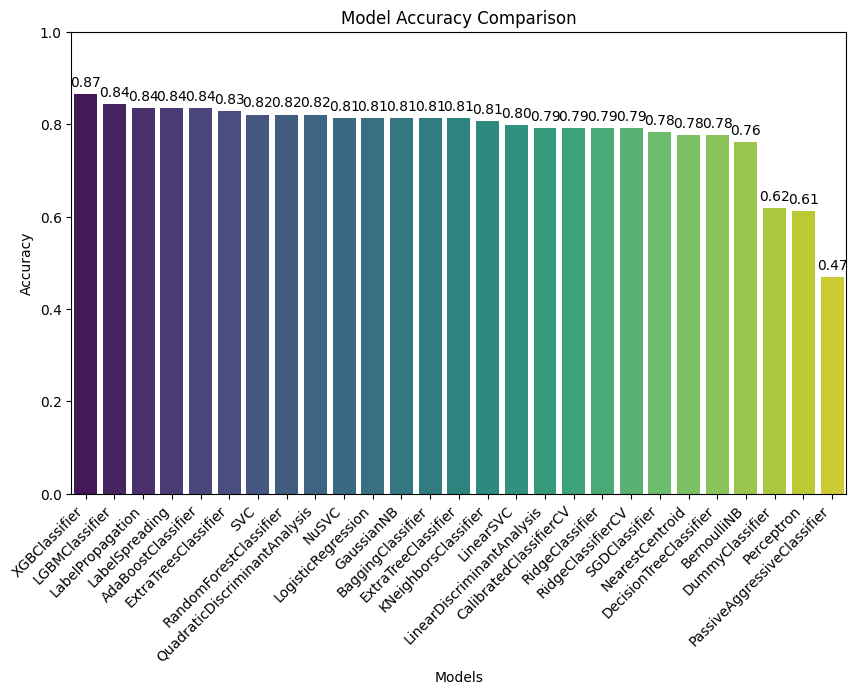

In [126]:
models_sorted = models.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=models_sorted.index, y="Accuracy", data=models_sorted, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1) 
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")

for index, value in enumerate(models_sorted["Accuracy"]):
    plt.text(index, value + 0.01, f'{value:.2f}', ha="center", va="bottom")

plt.show()

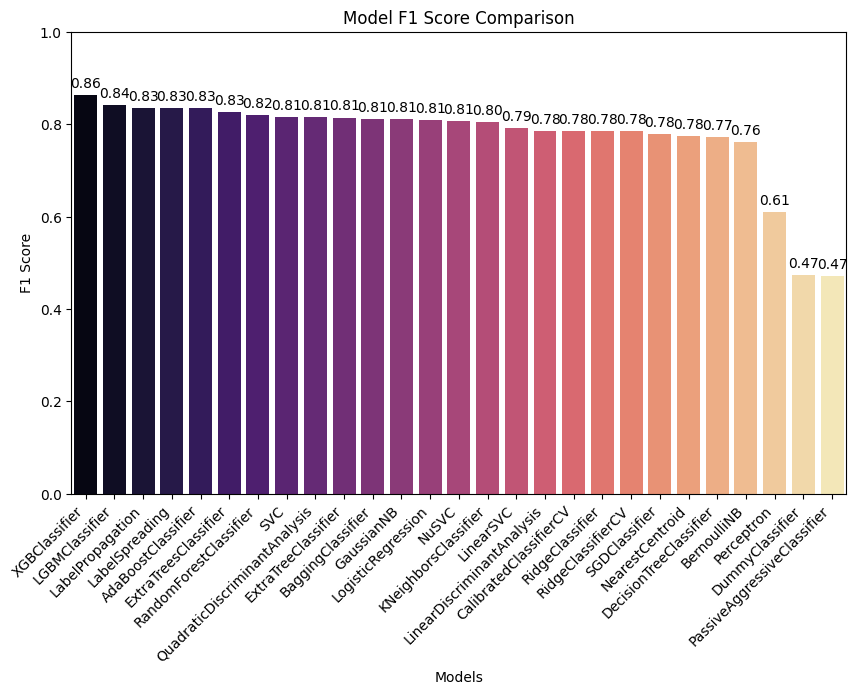

In [127]:
models_sorted = models.sort_values(by="F1 Score", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=models_sorted.index, y="F1 Score", data=models_sorted, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xlabel("Models")

for index, value in enumerate(models_sorted["F1 Score"]):
    plt.text(index, value + 0.01, f'{value:.2f}', ha="center", va="bottom")

plt.show()


In [128]:
## THANK YOUUU